In [2]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

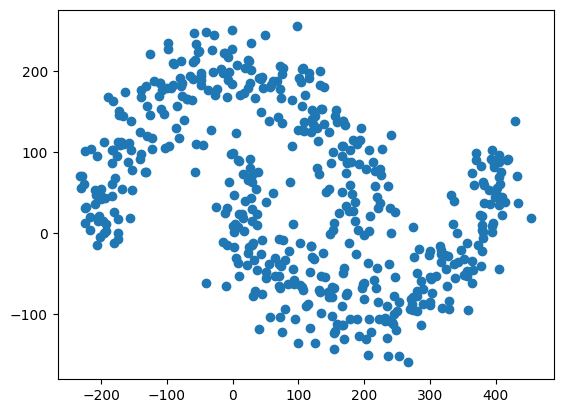

In [3]:
noisy_moons, _ = datasets.make_moons(n_samples=500, noise=0.15)
noisy_moons *= 200
data = pd.DataFrame(noisy_moons, columns=["x", "y"])
plt.scatter(data.x, data.y);

In [4]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.is_core = False
        self.neighbours = []
        self.cluster = None

    def dist(self, other):
        return abs(self.x-other.x)+abs(self.y-other.y)

    def expand(self, cluster):
        self.cluster = cluster
        for neigh in self.neighbours:
            if neigh.cluster is None:
                neigh.cluster = cluster
                if neigh.is_core:
                    neigh.expand(cluster)

    def __str__(self):
        return f"({self.x:0.3f}, {self.y:0.3f}, {self.cluster}, {self.is_core})"

    def __repr__(self):
        return f"Point(x={self.x:0.2f}, y={self.y:0.2f}, cluster={self.cluster}, is_core={self.is_core})"


def data2Points(data):
    points = []
    for _, p1 in data.iterrows():
        points.append(Point(p1.x, p1.y))
    return points


def points2Data(points):
    data = pd.DataFrame()
    data["x"] = pd.Series([p.x for p in points])
    data["y"] = pd.Series([p.y for p in points])
    data["cluster"] = pd.Series(
        [p.cluster if p.cluster else 0 for p in points])
    return data


def generate_core_point(eps, minPts, points):
    for i in range(len(points)-1):
        p1 = points[i]
        for j in range(i+1, len(points)):
            p2 = points[j]
            if p1.dist(p2) < eps:
                p1.neighbours.append(p2)
                p2.neighbours.append(p1)
    cores = []
    for p in points:
        if len(p.neighbours) >= minPts:
            p.is_core = True
            cores.append(p)
    return cores


def remove_cluster(cores):
    new_cores = []
    for p in cores:
        if p.cluster is None:
            new_cores.append(p)
    return new_cores


def clusterize(cores):
    cluster = 1
    while len(cores) > 0:
        cores[0].expand(cluster)
        cores = remove_cluster(cores)
        cluster += 1


def plot_clusters(data):
    clusters = data.cluster.unique()
    for cluster in clusters:
        df = data[data.cluster == cluster]
        plt.scatter(df.x, df.y)
    plt.show()


In [5]:
ini = time.time()
points = data2Points(data)
eps = 35
minPts = 4
cores = generate_core_point(eps, minPts, points)
clusterize(cores)
print("Time:", time.time()-ini)
clusterized_data = points2Data(points)

Time: 0.053700923919677734


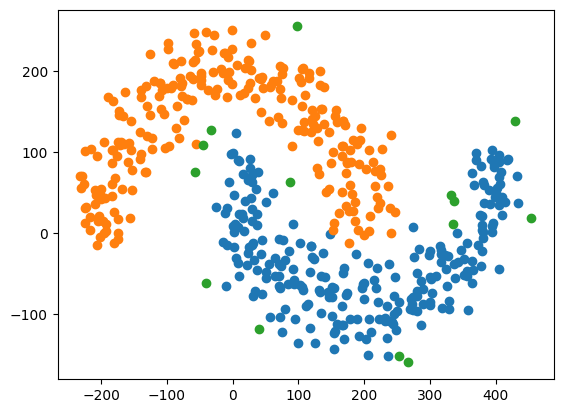

In [6]:
plot_clusters(clusterized_data)